In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib as mpl

top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM')
import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis

yr_time = 21733327.980990734
msun_mass = 3013.804161676407
sn_time = 9.2e-06 * yr_time; print(sn_time)

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

199.94661742511477


! Accretion rate, scaled by rotation rate.\
! The accretion rate is expressed as a fraction times the rotation rate at the accretion radius, except a create_fraction is used when the\
! mass is zero.\

In [2]:
folder = '/groups/astro/kxm508/codes/python_dispatch/validations'
sink13_T, sink13_M = np.genfromtxt(folder + '/sink13_accrate.txt')
sink13_mdot = np.gradient(sink13_M, sink13_T, edge_order = 1)

In [11]:
last_sn = 400
final_snap = [274, 264, 308, last_sn];
names = ['s13_no_outflow','s13_candidate', 's13_09_servoF','sink13fmr05']


sink_mass = {key: [] for key in names}
for i, run in enumerate(names):
    for sn in range(223, final_snap[i] + 1):
        try: 
            df = pd.read_csv(f'data/{run}/00{sn}/stars.txt', header = 1, delimiter='\s+')
            
            sink_mass[run].append(df['m'][13])
        except: 
            print(f'data/{run}/00{sn}/stars.txt, MISSING')
            continue
        

for key in sink_mass: sink_mass[key] = np.array(sink_mass[key])
sink_mdot = [np.gradient(sink_mass[run].flatten() * msun_mass, sn_time, edge_order = 1) for run in names]

data/s13_no_outflow/00274/stars.txt, MISSING
data/s13_candidate/00264/stars.txt, MISSING
data/sink13fmr05/00248/stars.txt, MISSING
data/sink13fmr05/00265/stars.txt, MISSING
data/sink13fmr05/00286/stars.txt, MISSING
data/sink13fmr05/00303/stars.txt, MISSING
data/sink13fmr05/00307/stars.txt, MISSING
data/sink13fmr05/00309/stars.txt, MISSING
data/sink13fmr05/00311/stars.txt, MISSING
data/sink13fmr05/00315/stars.txt, MISSING
data/sink13fmr05/00319/stars.txt, MISSING
data/sink13fmr05/00320/stars.txt, MISSING


In [12]:
fig, ax = plt.subplots(1,2, figsize = (18, 6), dpi = 1000)

last_time = 15

axs = ax[0]
#axs.semilogy(np.arange(1, len(sink_buks) + 1)  * buks_sntime, sink_buks * msun_mass, 'o-', label = 'Buks')
axs.set(ylabel = 'M_star [M_sun]', xlabel = 'Time [kyr]')
for run in names:
    if run == 's13_09_servoF': continue
    if run == 'sink13fmr05':
        ls = '--'; color = 'black'
    else: ls = '-'; color = None
    axs.semilogy(np.arange(1, len(sink_mass[run]) + 1)  * sn_time*1e-3, sink_mass[run] * msun_mass,  ls,color = color, label = run)
axs.semilogy(sink13_T*1e-3, sink13_M, lw = 2, color = 'red', label = 'Ramses13')

axs.semilogy(np.arange(1, len(sink_mass['s13_09_servoF']) + 1)  * sn_time*1e-3 , 
            sink_mass['s13_09_servoF'] * msun_mass, color = 'grey', ls = '-', lw = 1.2)

axs.set(title = f'Sink mass', ylim = (5e-3, 1e0), xlim = (0,last_time))


axs = ax[1] 
#axs.semilogy(np.arange(1, len(mdot_buks) + 1)  * sn_time, mdot_buks, 'o-', label = run)
axs.set(ylabel = 'M_dot [M$_\odot$/yr]', xlabel = 'Time [kyr]')
for i, run in enumerate(names):
    if run == 's13_09_servoF': continue
    if run == 'sink13fmr05':
        ls = '--'; color = 'black'
    else: ls = '-'; color = None
    axs.semilogy(np.arange(1, len(sink_mass[run]) + 1)  * sn_time*1e-3, sink_mdot[i], ls,color = color, label = run)

axs.semilogy(sink13_T*1e-3, sink13_mdot, lw = 2, color = 'red', label = 'Ramses13')
axs.semilogy(np.arange(1, len(sink_mdot[-2]) + 1)  * sn_time*1e-3 , 
                sink_mdot[-2], label = 's13_09_servoF', color = 'grey', ls = '-')

axs.set(title = f'Accretion rate', ylim = (1e-6, 0.5e-4), xlim = (0,last_time))

axs.legend(frameon = False, loc = 'upper right', bbox_to_anchor = (1.5,1))

plt.tight_layout()


In [13]:
def plot_acc_study(sn, nm, time):
    mass = {key: [] for key in names}
    for i, run in enumerate(names):
        for sn in range(223, snaps[i] + 1):
            try: 
                df = pd.read_csv(f'data/{run}/00{sn}/stars.txt', header = 1, delimiter='\s+')           
                mass[run].append(df['m'][13])
            except: 
                continue    

    for key in mass: mass[key] = np.array(mass[key]).flatten()
    mdot = [np.gradient(mass[run].flatten() * msun_mass, sn_time, edge_order = 1) for run in names]

    fig, ax = plt.subplots(1,2, figsize = (18, 6))


    axs = ax[0]
    axs.set(ylabel = 'M_star [M_sun]', xlabel = 'Time [kyr]')

    axs.semilogy(sink13_T*1e-3, sink13_M, lw = 2, color = 'red', label = 'Ramses13')
    axs.semilogy(np.arange(1, len(sink_mass['sink13fmr05']) + 1)  * sn_time*1e-3 , 
                sink_mass['sink13fmr05'] * msun_mass, label = 'sink13fmr05', color = 'black', ls = '--')
    axs.semilogy(np.arange(1, len(sink_mass['s13_09_servoF']) + 1)  * sn_time*1e-3 , 
                sink_mass['s13_09_servoF'] * msun_mass, color = 'grey', ls = '-', lw = 1.2)
    for run in names:
        axs.semilogy(np.arange(1, len(mass[run]) + 1)  * sn_time*1e-3, mass[run] * msun_mass, label = run)
   

    axs.set(title = f'Sink mass', ylim = (5e-3, 1e0), xlim = (0,time))


    axs = ax[1] 
    axs.semilogy(sink13_T*1e-3, sink13_mdot, lw = 2, color = 'red', label = 'Ramses13')
    axs.semilogy(np.arange(1, len(sink_mdot[-1]) + 1)  * sn_time*1e-3 , 
                sink_mdot[-1], label = 'sink13fmr05', color = 'black', ls = '--')
    axs.semilogy(np.arange(1, len(sink_mdot[-2]) + 1)  * sn_time*1e-3 , 
                sink_mdot[-2], label = 's13_09_servoF', color = 'grey', ls = '-')
    
    axs.set(ylabel = 'M_dot [M$_\odot$/yr]', xlabel = 'Time [kyr]')
    
    for i, run in enumerate(names):
        axs.semilogy(np.arange(1, len(mdot[i]) + 1)  * sn_time*1e-3, mdot[i], label = run)

    axs.set(title = f'Accretion rate', ylim = (1e-7, 1e-4), xlim = (0,time))

    axs.legend(frameon = False, loc = 'upper right', bbox_to_anchor = (1.42,1))

    plt.tight_layout()


# ACCRETION CELLS
### ! accretion radius in cells at levelmax

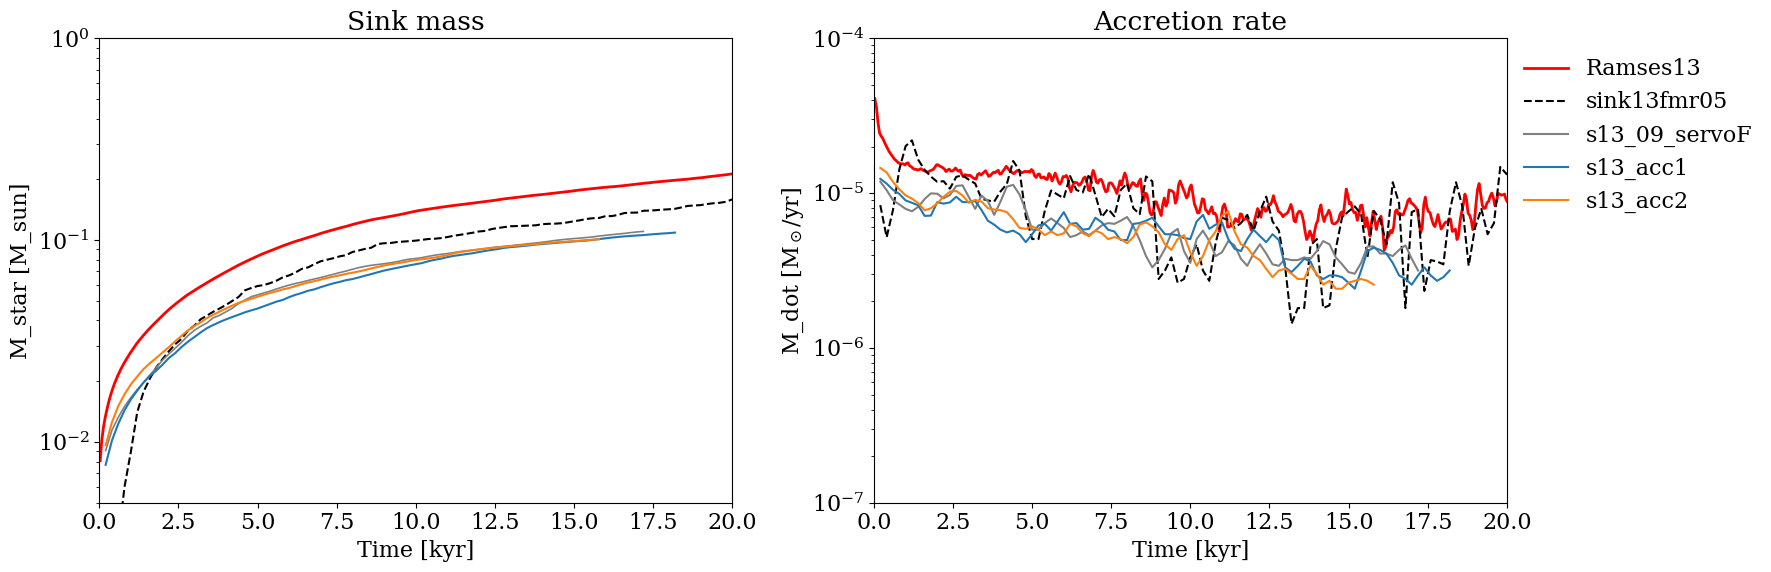

In [14]:
snaps = [313, 302]
names = ['s13_acc1', 's13_acc2']

plot_acc_study(snaps, names, 20)


# PER ω
### ! fraction of mass per radian orbital

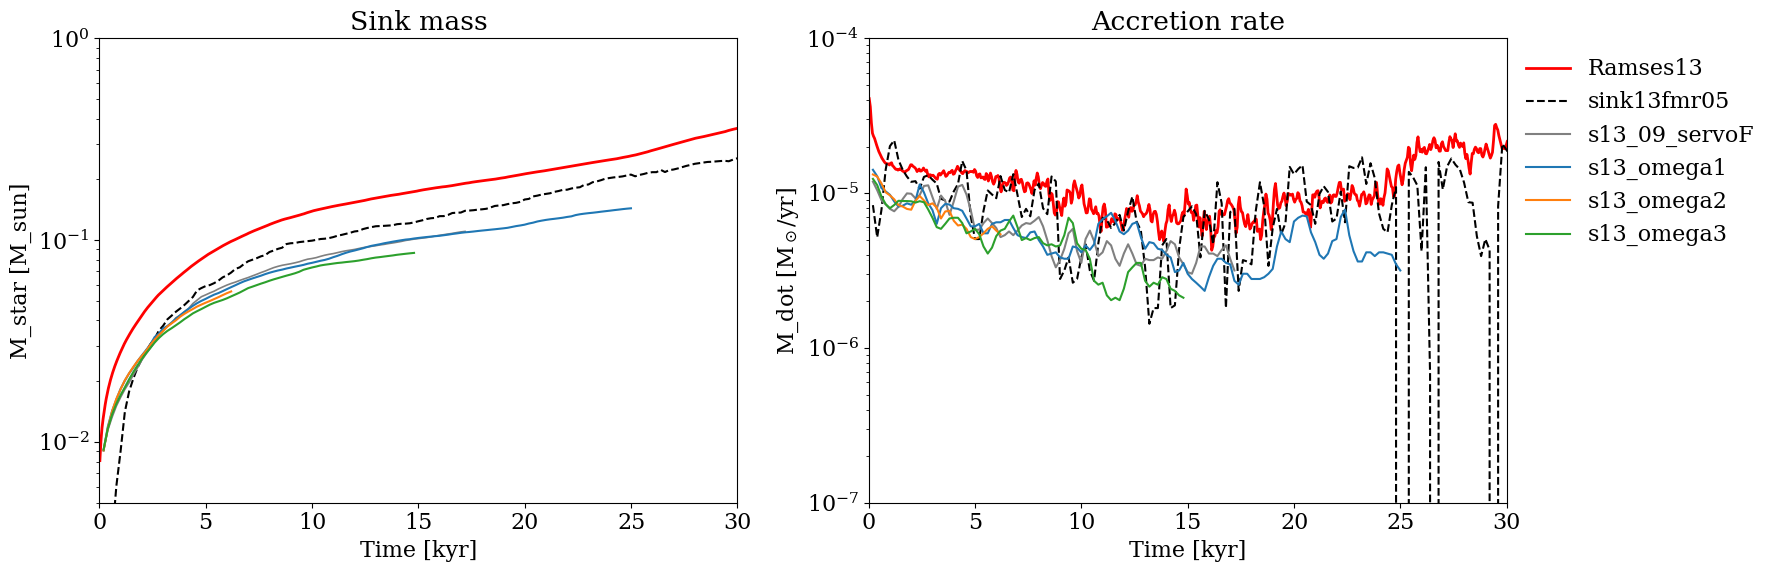

In [15]:
snaps = [347, 254, 297]; names = ['s13_omega1', 's13_omega2','s13_omega3']
last_time =30
plot_acc_study(snaps, names, last_time)

# MAX ACCRETION FRACTIOM
### ! max removal of density in accretion

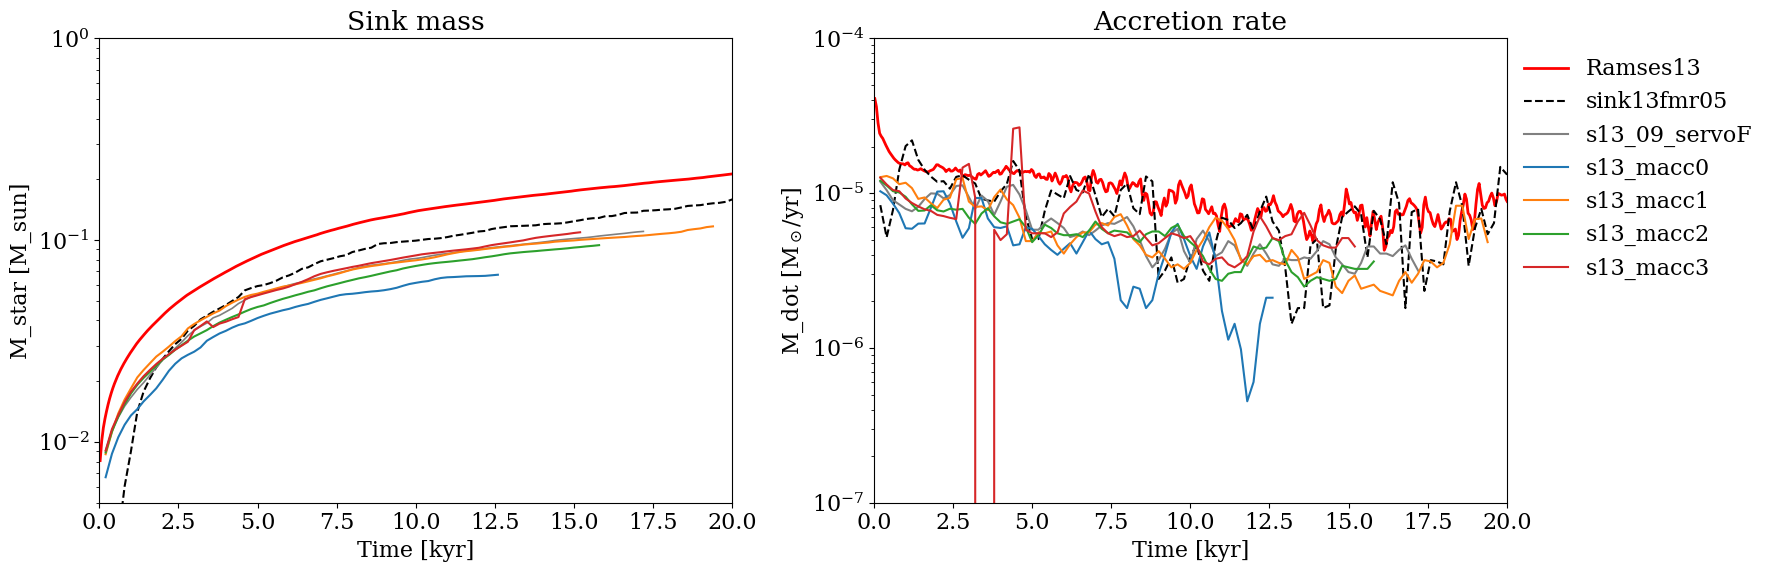

In [16]:
snaps = [285, 319, 301, 298]; names = ['s13_macc0','s13_macc1', 's13_macc2', 's13_macc3']
plot_acc_study(snaps, names, 20)

# MAX CREATE FRACTION
### ! max density fraction inside acc radius

#### *Initial step for sink13*
d_create,m_create,m_solar,levelmax=    8.63E+09    3.83E-06    1.16E-02  20

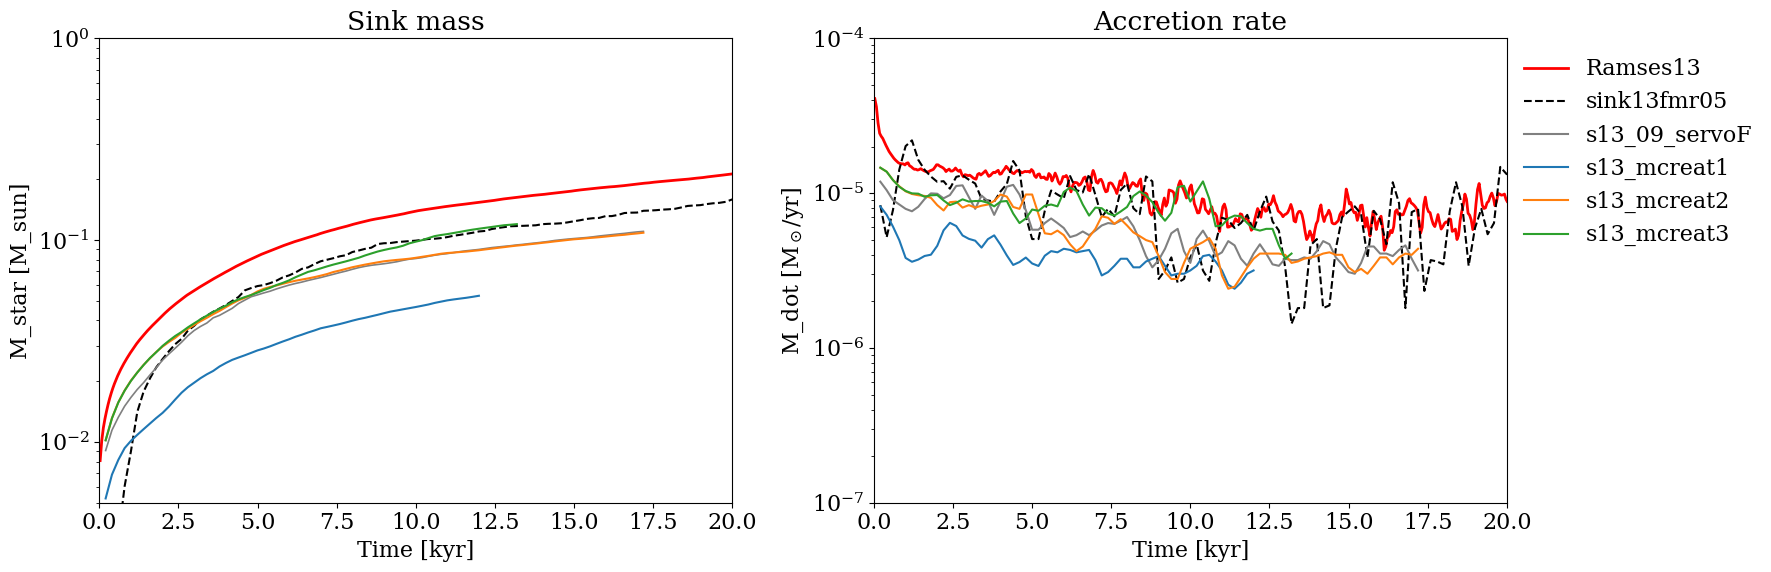

In [17]:
snaps = [282, 309, 289]; names = ['s13_mcreat1', 's13_mcreat2', 's13_mcreat3']
last_time = 20
plot_acc_study(snaps, names, last_time)

# THRESHOLD CELLS


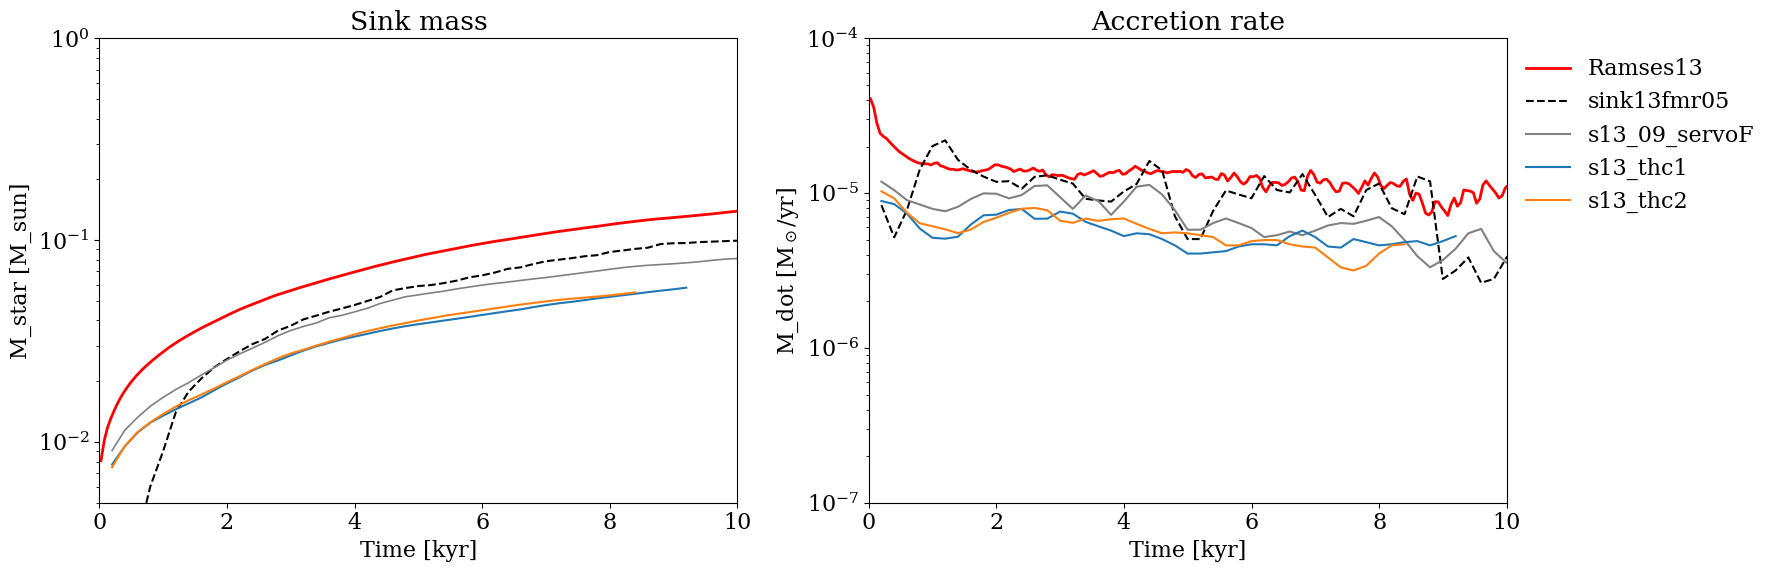

In [10]:
snaps = [268, 264]; names = ['s13_thc1', 's13_thc2']
last_time = 10
plot_acc_study(snaps, names, last_time)

## NEW ACCRETION (ACCRETION CELLS)

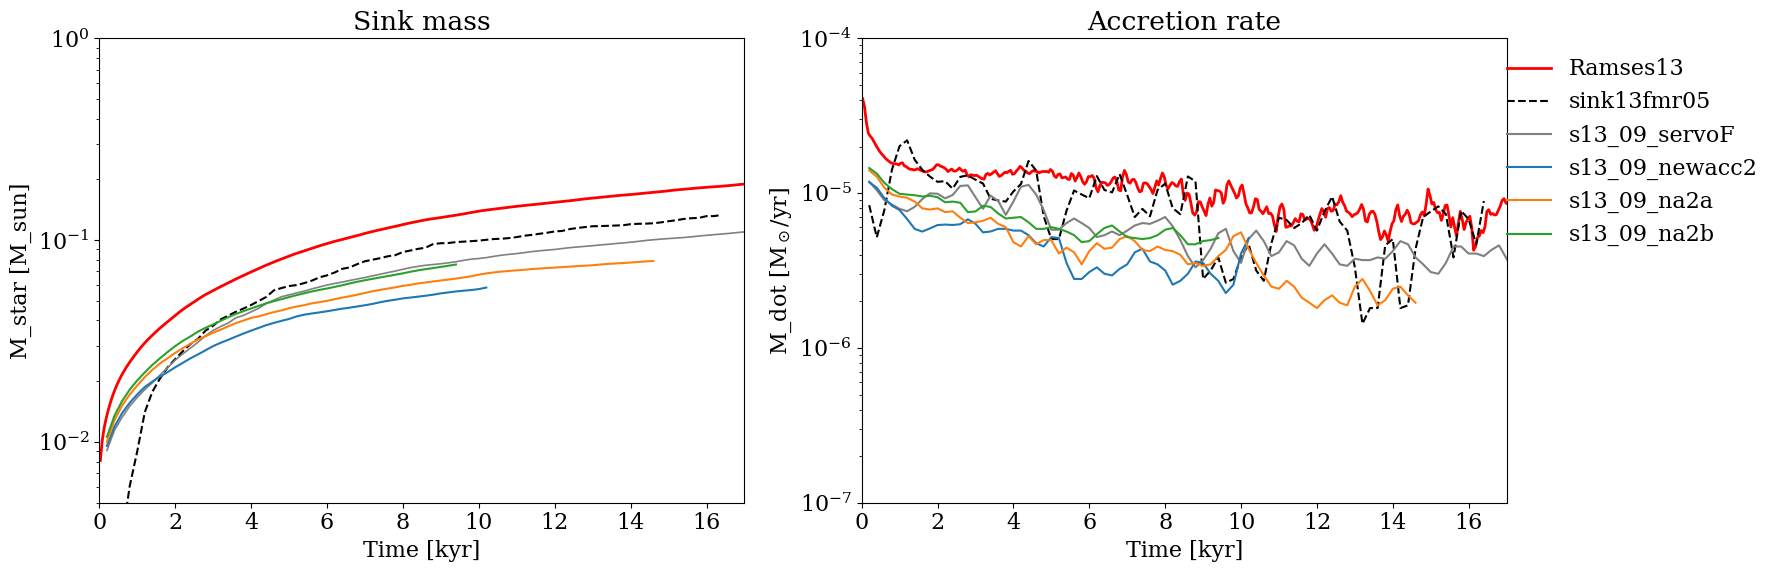

In [11]:
snaps = [274, 295, 270]; names = ['s13_09_newacc2', 's13_09_na2a', 's13_09_na2b']
last_time = 17
plot_acc_study(snaps, names, last_time)

## AMR

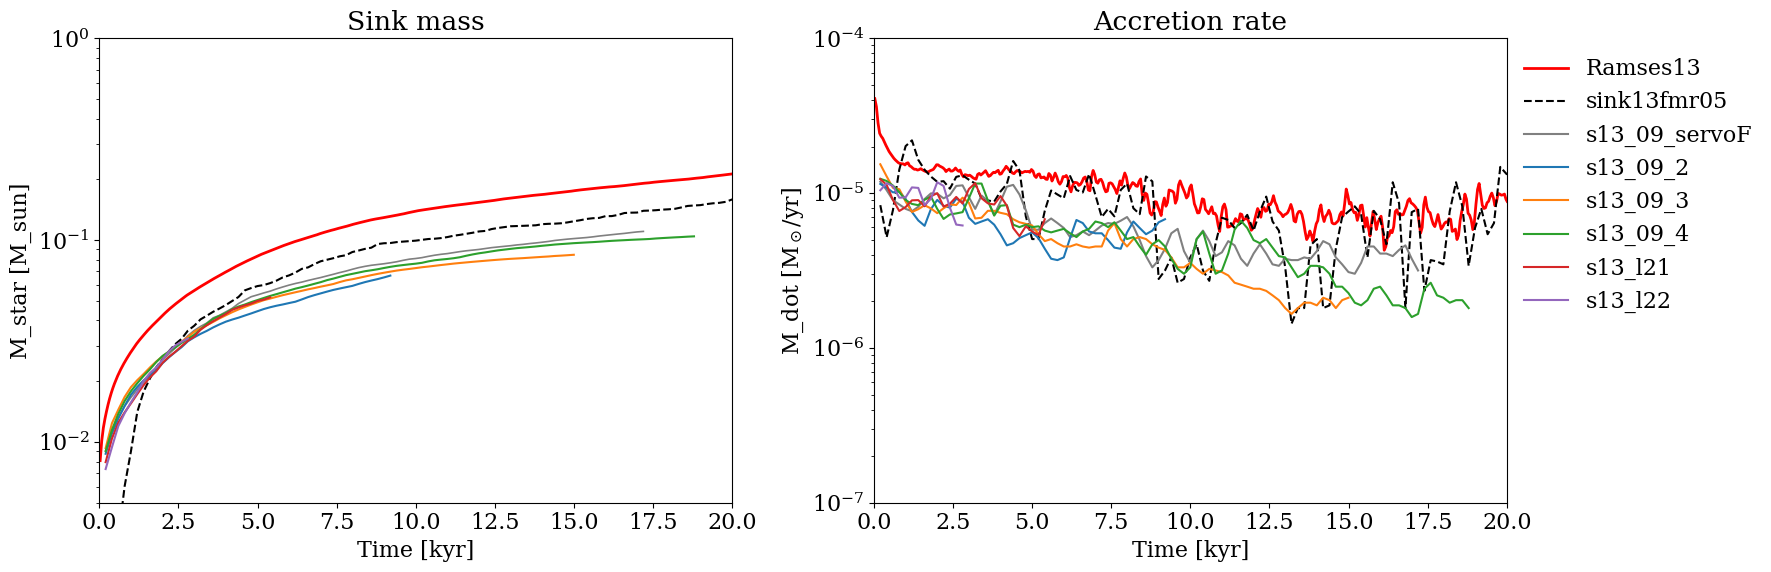

In [18]:
snaps = [268, 298, 317, 249, 236]; names = ['s13_09_2', 's13_09_3', 's13_09_4', 's13_l21', 's13_l22']
last_time = 20
plot_acc_study(snaps, names, last_time)